# 1. Model & Tahmin (LightGBM)

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv("diabetes.csv")

df = diabetes.copy()

df = df.dropna()

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
df.shape

(768, 9)

In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

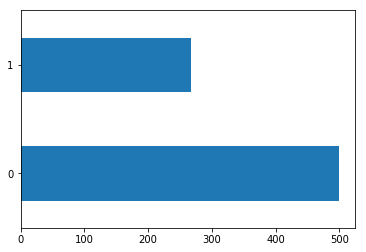

In [6]:
df["Outcome"].value_counts().plot.barh();

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
y = df["Outcome"]

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
X = df.drop(["Outcome"], axis = 1)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [24]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [25]:
y_pred = lgbm_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7272727272727273

# 2. Model Doğrulama / Model Tuning (Light GBM)

In [26]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [27]:
?lgbm_model

Type:           LGBMClassifier
String form:   
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
           impo <...> ambda=0.0, silent=True,
           subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
File:           c:\users\sefa3\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, -1 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/ad

In [28]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [30]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [31]:
lgbm_cv_model.fit(X_train, y_train)

lgbm_cv_model.best_params_

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 1039 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 1484 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2011 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2618 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3307 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4076 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4973 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  6.7min finished


{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 500,
 'subsample': 0.6}

In [32]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [33]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [34]:
y_pred = lgbm_tuned.predict(X_test)

accuracy_score(y_test, y_pred)

0.7445887445887446